In [1]:
from PIL import Image
from os import listdir
from matplotlib import image
from matplotlib import pyplot
import tensorflow as tf
from ipywidgets import IntProgress
from IPython.display import display
import winsound
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import pickle

loaded_images = list() # will append values to list
image_labels = list()
math_symbols =  ['+','-','times']
class_labels = ['0','1','2','3','4','5','6','7','8','9']+ math_symbols

# 0 to 9 is 0 to 9, 10 and so on correspond with order in math symbols -> for labels
for i in range(0,10): # range second number does not include number!!!!!!
    f = IntProgress(min=0, max=len(listdir('handwrittenmathsymbols/'+str(i)))) # Progress bar
    display(f)
    display(str(i))
    for filename in listdir('handwrittenmathsymbols/'+str(i)):
        f.value +=1
        if not((i == 1 or i ==2) and f.value % 2 == 0): # rids of half on ones and twos
            img_data = image.imread('handwrittenmathsymbols/'+str(i)+'/' + filename)
            loaded_images.append(img_data.astype('uint8'))
            image_labels.append(i)
        #if((i == 1 or i ==2) and f.value % 2 == 0): # rids of half on ones and twos
        #    loaded_images.pop()
        #    image_labels.pop()
        #print(i)
        #pyplot.imshow(img_data)
        #pyplot.show()
j = 10
for symbol in math_symbols:
    f = IntProgress(min=0, max=len(listdir('handwrittenmathsymbols/'+symbol)))
    display(f)
    display(symbol)
    for filename in listdir('handwrittenmathsymbols/'+symbol):
        f.value +=1
        if not((j == 10 and f.value % 2 == 0) or (j == 11 and (f.value % 2 == 0 or f.value % 3 == 0))):
            img_data = image.imread('handwrittenmathsymbols/'+symbol+'/' + filename)
            loaded_images.append(img_data.astype('uint8'))
            image_labels.append(j)
        #if((j == 10 and f.value % 2 == 0) or (j == 11 and (f.value % 2 == 0 or f.value % 3 == 0))):
        #    loaded_images.pop()
        #    image_labels.pop()
        #print(symbol)
        #pyplot.imshow(img_data)
        #pyplot.show()
    j += 1
    
pickle.dump(loaded_images, open('loaded_images.p', 'wb'))
pickle.dump(image_labels, open('image_labels.p', 'wb'))
# Alarm
duration = 2000  # milliseconds
freq = 440  # Hz
winsound.Beep(freq, duration)

IntProgress(value=0, max=6914)

'0'

IntProgress(value=0, max=26520)

'1'

IntProgress(value=0, max=10909)

'3'

IntProgress(value=0, max=5315)

'5'

IntProgress(value=0, max=4093)

'6'

IntProgress(value=0, max=3823)

'7'

IntProgress(value=0, max=4456)

'8'

IntProgress(value=0, max=4350)

'9'

IntProgress(value=0, max=25112)

'+'

IntProgress(value=0, max=3251)

'times'

(array([ 6914., 13260., 13071., 10909.,  7396.,  5315.,  4093.,  3823.,
         4456.,  4350., 12556., 11333.,  3251.]),
 array([ 0.        ,  0.92307692,  1.84615385,  2.76923077,  3.69230769,
         4.61538462,  5.53846154,  6.46153846,  7.38461538,  8.30769231,
         9.23076923, 10.15384615, 11.07692308, 12.        ]),
 <a list of 13 Patch objects>)

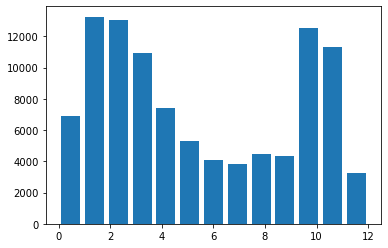

In [2]:
# this block removes some 1,2,+,-, times
#1: 15000
#2: 15000
#+: 15000
#-: 22000
#times: 4000
#print(img_data.shape)
#print(image_labels.shape)
#loaded_img = list()

#for i in range(0,len(image_labels)):
#    if int(image_labels[i]) == 7:
#        print(str(loaded_images[i].shape))

#for img in loaded_images:
#    loaded_img.append(img.astype('uint8'))

pyplot.hist(image_labels, bins=13, histtype='bar', rwidth=.8)


In [31]:
for i in range(0,len(image_labels)):
    #if int(image_labels[i]) == 7 and str(loaded_img[i].dtype) != 'uint8':
    if str(loaded_img[i].dtype) != 'uint8':
        print(str(loaded_img[i].dtype))
#print(loaded_images.dtype)

In [3]:
'''
from PIL import Image
from os import listdir
#from matplotlib import image
#from matplotlib import pyplot
import tensorflow as tf
from ipywidgets import IntProgress
from IPython.display import display
import winsound
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import pickle

print(tf.__version__)
from tensorflow import keras
'''
import tensorflow as tf
from ipywidgets import IntProgress
from sklearn.model_selection import train_test_split

f = IntProgress(min=0, max=5)
display(f)

loaded_img = list()
for img in loaded_images:
    if img.ndim == 3:
        loaded_img.append(img[:,:,0]) # remove rgb channel
    else:
        loaded_img.append(img)

X_train, X_test, y_train, y_test = train_test_split(loaded_img, image_labels, test_size=0.2, shuffle=True)
f.value += 1

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
f.value += 1

X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
f.value += 1
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)
f.value += 1

X_train = tf.reshape(X_train, [-1,45,45,1]) # added 4 dimension size of one for the channel number
X_test = tf.reshape(X_test, [-1,45,45,1])
f.value += 1

#X_train = tf.reshape(X_train, [-1,45,45,1]) # added 4 dimension size of one for the channel number
#X_train.append(tf.reshape(X_train, [len(image_labels)-50000,45,45,1]))
#f.value += 1

IntProgress(value=0, max=5)

In [8]:
#print(y_train)
#for i in y_train:
#    print(i)
#print(X_train.shape)
#print(image_labels)
#print(y_train.shape)
#print(X_train.dtype)
#print(y_train.dtype)
#X=X_train
#X=tf.reshape(X, [-1,45,45,1])
#for i in y_train:
#    print(i)
import tensorflow as tf



import os
if __name__ == '__main__':
    os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
    os.environ['CUDA_VISIBLE_DEVICES'] = '0'
    os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

print(tf.config.list_physical_devices('GPU'))
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

import time
LOG_DIR = f"{int(time.time())}"

def build_model(hp):  # random search passes this hyperparameter() object 
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D(hp.Int('conv_1_units', min_value=16,max_value=128, step=16)
                        , (3, 3), input_shape=X_train.shape[1:]))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Conv2D(hp.Int('conv_2_units', min_value=16,max_value=128, step=16)
                         , (3, 3)))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Conv2D(hp.Int('conv_3_units', min_value=16,max_value=128, step=16)
                         , (3, 3)))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    
    model.add(tf.keras.layers.Flatten()) 
    
    model.add(tf.keras.layers.Dense(hp.Int('input_1_units', min_value=64, max_value=256, step=64), activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(hp.Int('input_2_units', min_value=64, max_value=256, step=64), activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(10 + len(math_symbols), activation=tf.nn.softmax))

    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # how many model variations to test?
    executions_per_trial=5,  # how many trials per variation? (same model could perform differently)
    directory=os.path.normpath('C:/Users/eleeh/Documents'))
              
tuner.search(x=X_train,
             y=y_train,
            verbose = 2,
            epochs=5,
            validation_data=(X_test, y_test))
tuner.results_summary()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
INFO:tensorflow:Reloading Oracle from existing project C:\Users\eleeh\Documents\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from C:\Users\eleeh\Documents\untitled_project\tuner0.json
Train on 76053 samples, validate on 19014 samples
Epoch 1/5
76053/76053 - 21s - loss: 0.5407 - accuracy: 0.8393 - val_loss: 0.2106 - val_accuracy: 0.9359
Epoch 2/5
76053/76053 - 19s - loss: 0.1712 - accuracy: 0.9510 - val_loss: 0.1551 - val_accuracy: 0.9526
Epoch 3/5
76053/76053 - 20s - loss: 0.1180 - accuracy: 0.9660 - val_loss: 0.1201 - val_accuracy: 0.9628
Epoch 4/5
76053/76053 - 20s - loss: 0.0902 - accuracy: 0.9734 - val_loss: 0.1113 - val_accuracy: 0.9661
Epoch 5/5
76053/76053 - 20s - loss: 0.0711 - accuracy: 0.9789 - val_loss: 0.0842 - val_accuracy: 0.9737
Train on 76053 samples, validate on 19014 samples
Epoch 1/5
76053/76053 - 21s - loss: 0.5295 - accuracy: 0.8370 - val_loss: 0.1976 - val_accuracy: 0.9422
Epoch 2/5

Train on 76053 samples, validate on 19014 samples
Epoch 1/5
76053/76053 - 31s - loss: 0.4151 - accuracy: 0.8679 - val_loss: 0.1021 - val_accuracy: 0.9708
Epoch 2/5
76053/76053 - 29s - loss: 0.0866 - accuracy: 0.9756 - val_loss: 0.0714 - val_accuracy: 0.9803
Epoch 3/5
76053/76053 - 30s - loss: 0.0555 - accuracy: 0.9844 - val_loss: 0.0530 - val_accuracy: 0.9855
Epoch 4/5
76053/76053 - 29s - loss: 0.0396 - accuracy: 0.9883 - val_loss: 0.0368 - val_accuracy: 0.9891
Epoch 5/5
76053/76053 - 29s - loss: 0.0303 - accuracy: 0.9909 - val_loss: 0.0585 - val_accuracy: 0.9824
Train on 76053 samples, validate on 19014 samples
Epoch 1/5
76053/76053 - 29s - loss: 0.3522 - accuracy: 0.8914 - val_loss: 0.1069 - val_accuracy: 0.9686
Epoch 2/5
76053/76053 - 31s - loss: 0.0858 - accuracy: 0.9747 - val_loss: 0.0827 - val_accuracy: 0.9764
Epoch 3/5
76053/76053 - 29s - loss: 0.0560 - accuracy: 0.9837 - val_loss: 0.0681 - val_accuracy: 0.9810
Epoch 4/5
76053/76053 - 29s - loss: 0.0409 - accuracy: 0.9878 - val_

Train on 76053 samples, validate on 19014 samples
Epoch 1/5
76053/76053 - 43s - loss: 0.3004 - accuracy: 0.9067 - val_loss: 0.0751 - val_accuracy: 0.9793
Epoch 2/5
76053/76053 - 40s - loss: 0.0661 - accuracy: 0.9812 - val_loss: 0.0455 - val_accuracy: 0.9861
Epoch 3/5
76053/76053 - 41s - loss: 0.0443 - accuracy: 0.9873 - val_loss: 0.0399 - val_accuracy: 0.9889
Epoch 4/5
76053/76053 - 41s - loss: 0.0330 - accuracy: 0.9903 - val_loss: 0.0418 - val_accuracy: 0.9894
Epoch 5/5
76053/76053 - 41s - loss: 0.0254 - accuracy: 0.9927 - val_loss: 0.0253 - val_accuracy: 0.9928
Train on 76053 samples, validate on 19014 samples
Epoch 1/5
76053/76053 - 42s - loss: 0.2939 - accuracy: 0.9101 - val_loss: 0.1072 - val_accuracy: 0.9677
Epoch 2/5
76053/76053 - 40s - loss: 0.0734 - accuracy: 0.9786 - val_loss: 0.0507 - val_accuracy: 0.9854
Epoch 3/5
76053/76053 - 41s - loss: 0.0467 - accuracy: 0.9864 - val_loss: 0.0568 - val_accuracy: 0.9821
Epoch 4/5
76053/76053 - 40s - loss: 0.0356 - accuracy: 0.9898 - val_

Train on 76053 samples, validate on 19014 samples
Epoch 1/5
76053/76053 - 29s - loss: 0.3522 - accuracy: 0.8917 - val_loss: 0.1092 - val_accuracy: 0.9680
Epoch 2/5
76053/76053 - 28s - loss: 0.0859 - accuracy: 0.9753 - val_loss: 0.0593 - val_accuracy: 0.9837
Epoch 3/5
76053/76053 - 29s - loss: 0.0556 - accuracy: 0.9844 - val_loss: 0.0502 - val_accuracy: 0.9863
Epoch 4/5
76053/76053 - 27s - loss: 0.0412 - accuracy: 0.9882 - val_loss: 0.0342 - val_accuracy: 0.9903
Epoch 5/5
76053/76053 - 26s - loss: 0.0306 - accuracy: 0.9913 - val_loss: 0.0369 - val_accuracy: 0.9906
Train on 76053 samples, validate on 19014 samples
Epoch 1/5
76053/76053 - 26s - loss: 0.4944 - accuracy: 0.8429 - val_loss: 0.1125 - val_accuracy: 0.9663
Epoch 2/5
76053/76053 - 27s - loss: 0.0954 - accuracy: 0.9729 - val_loss: 0.0719 - val_accuracy: 0.9797
Epoch 3/5
76053/76053 - 27s - loss: 0.0615 - accuracy: 0.9823 - val_loss: 0.0565 - val_accuracy: 0.9836
Epoch 4/5
76053/76053 - 26s - loss: 0.0451 - accuracy: 0.9872 - val_

Train on 76053 samples, validate on 19014 samples
Epoch 1/5
76053/76053 - 27s - loss: 0.3994 - accuracy: 0.8748 - val_loss: 0.1169 - val_accuracy: 0.9653
Epoch 2/5
76053/76053 - 26s - loss: 0.1020 - accuracy: 0.9704 - val_loss: 0.0925 - val_accuracy: 0.9738
Epoch 3/5
76053/76053 - 27s - loss: 0.0670 - accuracy: 0.9808 - val_loss: 0.0752 - val_accuracy: 0.9777
Epoch 4/5
76053/76053 - 26s - loss: 0.0502 - accuracy: 0.9855 - val_loss: 0.0429 - val_accuracy: 0.9885
Epoch 5/5
76053/76053 - 27s - loss: 0.0372 - accuracy: 0.9890 - val_loss: 0.0389 - val_accuracy: 0.9884
Train on 76053 samples, validate on 19014 samples
Epoch 1/5
76053/76053 - 30s - loss: 0.3801 - accuracy: 0.8848 - val_loss: 0.1208 - val_accuracy: 0.9660
Epoch 2/5
76053/76053 - 31s - loss: 0.0949 - accuracy: 0.9727 - val_loss: 0.1102 - val_accuracy: 0.9698
Epoch 3/5
76053/76053 - 33s - loss: 0.0620 - accuracy: 0.9826 - val_loss: 0.0526 - val_accuracy: 0.9860
Epoch 4/5
76053/76053 - 32s - loss: 0.0470 - accuracy: 0.9867 - val_

Train on 76053 samples, validate on 19014 samples
Epoch 1/5
76053/76053 - 39s - loss: 0.3867 - accuracy: 0.8796 - val_loss: 0.1191 - val_accuracy: 0.9646
Epoch 2/5
76053/76053 - 36s - loss: 0.0924 - accuracy: 0.9730 - val_loss: 0.0739 - val_accuracy: 0.9785
Epoch 3/5
76053/76053 - 38s - loss: 0.0627 - accuracy: 0.9813 - val_loss: 0.0535 - val_accuracy: 0.9839
Epoch 4/5
76053/76053 - 38s - loss: 0.0449 - accuracy: 0.9864 - val_loss: 0.0374 - val_accuracy: 0.9890
Epoch 5/5
76053/76053 - 36s - loss: 0.0338 - accuracy: 0.9902 - val_loss: 0.0548 - val_accuracy: 0.9835
Train on 76053 samples, validate on 19014 samples
Epoch 1/5
76053/76053 - 37s - loss: 0.3264 - accuracy: 0.8998 - val_loss: 0.1001 - val_accuracy: 0.9710
Epoch 2/5
76053/76053 - 35s - loss: 0.0793 - accuracy: 0.9769 - val_loss: 0.0678 - val_accuracy: 0.9803
Epoch 3/5
76053/76053 - 35s - loss: 0.0523 - accuracy: 0.9848 - val_loss: 0.0482 - val_accuracy: 0.9860
Epoch 4/5
76053/76053 - 35s - loss: 0.0374 - accuracy: 0.9891 - val_

Train on 76053 samples, validate on 19014 samples
Epoch 1/5
76053/76053 - 23s - loss: 0.5008 - accuracy: 0.8465 - val_loss: 0.1751 - val_accuracy: 0.9529
Epoch 2/5
76053/76053 - 22s - loss: 0.1318 - accuracy: 0.9618 - val_loss: 0.1173 - val_accuracy: 0.9657
Epoch 3/5
76053/76053 - 22s - loss: 0.0924 - accuracy: 0.9738 - val_loss: 0.0800 - val_accuracy: 0.9769
Epoch 4/5
76053/76053 - 21s - loss: 0.0714 - accuracy: 0.9797 - val_loss: 0.0700 - val_accuracy: 0.9782
Epoch 5/5
76053/76053 - 21s - loss: 0.0591 - accuracy: 0.9829 - val_loss: 0.0573 - val_accuracy: 0.9841
Train on 76053 samples, validate on 19014 samples
Epoch 1/5
76053/76053 - 22s - loss: 0.4252 - accuracy: 0.8705 - val_loss: 0.1581 - val_accuracy: 0.9542
Epoch 2/5
76053/76053 - 23s - loss: 0.1231 - accuracy: 0.9645 - val_loss: 0.0942 - val_accuracy: 0.9727
Epoch 3/5
76053/76053 - 22s - loss: 0.0834 - accuracy: 0.9754 - val_loss: 0.0754 - val_accuracy: 0.9781
Epoch 4/5
76053/76053 - 22s - loss: 0.0632 - accuracy: 0.9815 - val_

Train on 76053 samples, validate on 19014 samples
Epoch 1/5
76053/76053 - 28s - loss: 0.4058 - accuracy: 0.8758 - val_loss: 0.1368 - val_accuracy: 0.9595
Epoch 2/5
76053/76053 - 27s - loss: 0.1118 - accuracy: 0.9671 - val_loss: 0.0803 - val_accuracy: 0.9741
Epoch 3/5
76053/76053 - 27s - loss: 0.0725 - accuracy: 0.9787 - val_loss: 0.0740 - val_accuracy: 0.9791
Epoch 4/5
76053/76053 - 26s - loss: 0.0549 - accuracy: 0.9845 - val_loss: 0.0460 - val_accuracy: 0.9874
Epoch 5/5
76053/76053 - 26s - loss: 0.0425 - accuracy: 0.9874 - val_loss: 0.0485 - val_accuracy: 0.9861
Train on 76053 samples, validate on 19014 samples
Epoch 1/5
76053/76053 - 29s - loss: 0.4741 - accuracy: 0.8503 - val_loss: 0.1293 - val_accuracy: 0.9635
Epoch 2/5
76053/76053 - 27s - loss: 0.1126 - accuracy: 0.9669 - val_loss: 0.0790 - val_accuracy: 0.9782
Epoch 3/5
76053/76053 - 28s - loss: 0.0737 - accuracy: 0.9786 - val_loss: 0.0687 - val_accuracy: 0.9796
Epoch 4/5
76053/76053 - 26s - loss: 0.0566 - accuracy: 0.9834 - val_

Train on 76053 samples, validate on 19014 samples
Epoch 1/5
76053/76053 - 32s - loss: 0.3296 - accuracy: 0.8949 - val_loss: 0.0836 - val_accuracy: 0.9760
Epoch 2/5
76053/76053 - 29s - loss: 0.0654 - accuracy: 0.9808 - val_loss: 0.0437 - val_accuracy: 0.9862
Epoch 3/5
76053/76053 - 29s - loss: 0.0423 - accuracy: 0.9877 - val_loss: 0.0660 - val_accuracy: 0.9821
Epoch 4/5
76053/76053 - 59s - loss: 0.0292 - accuracy: 0.9916 - val_loss: 0.0417 - val_accuracy: 0.9880
Epoch 5/5
76053/76053 - 60s - loss: 0.0230 - accuracy: 0.9936 - val_loss: 0.0210 - val_accuracy: 0.9946
Train on 76053 samples, validate on 19014 samples
Epoch 1/5
76053/76053 - 61s - loss: 0.3013 - accuracy: 0.9060 - val_loss: 0.0977 - val_accuracy: 0.9714
Epoch 2/5
76053/76053 - 59s - loss: 0.0700 - accuracy: 0.9799 - val_loss: 0.0566 - val_accuracy: 0.9819
Epoch 3/5
76053/76053 - 58s - loss: 0.0450 - accuracy: 0.9868 - val_loss: 0.0377 - val_accuracy: 0.9891
Epoch 4/5
76053/76053 - 59s - loss: 0.0328 - accuracy: 0.9903 - val_

INFO:tensorflow:Oracle triggered exit


In [24]:
tuner.get_best_models()[0].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 43, 43, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 43, 43, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 19, 128)       36992     
_________________________________________________________________
activation_1 (Activation)    (None, 19, 19, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 112)         1

In [4]:
import os
if __name__ == '__main__':
    os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
    os.environ['CUDA_VISIBLE_DEVICES'] = '0'
    os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
    
from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())
#print(tf.__version__)

# conv2d output filters, kernal size
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=X_train.shape[1:]),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10 + len(math_symbols), activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
#print(model.summary())


history = model.fit(X_train, y_train, verbose=1, epochs=5)

Train on 80581 samples
Epoch 1/5
80581/80581 [==============================] - 42s 516us/sample - loss: 1.9815 - accuracy: 0.7069
Epoch 2/5
80581/80581 [==============================] - 34s 418us/sample - loss: 1.7491 - accuracy: 0.9401
Epoch 3/5
80581/80581 [==============================] - 34s 417us/sample - loss: 1.7059 - accuracy: 0.9832
Epoch 4/5
80581/80581 [==============================] - 34s 417us/sample - loss: 1.7031 - accuracy: 0.9859
Epoch 5/5
80581/80581 [==============================] - 33s 415us/sample - loss: 1.7027 - accuracy: 0.9863- loss: 1.7


(0.5, 1.0)

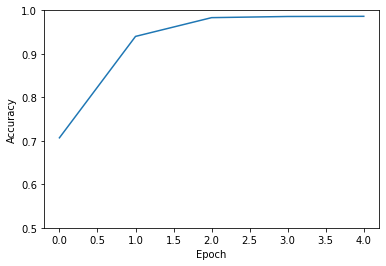

In [5]:
pyplot.plot(history.history['accuracy'], label='accuracy')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.ylim([0.5, 1])

In [6]:


val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)
predictions = model.predict(X_test)

20146/20146 [==============================] - 6s 314us/sample - loss: 1.6983 - accuracy: 0.9910
1.6982743170248837 0.99096596


In [10]:
model.save('math_reader_2.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: math_reader_2.model\assets


9
4


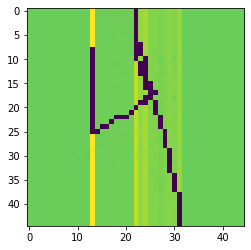

1
7


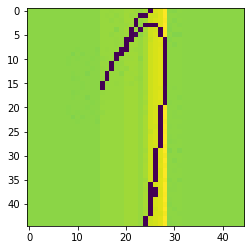

0
1


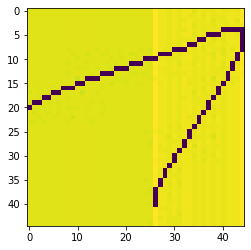

2
3


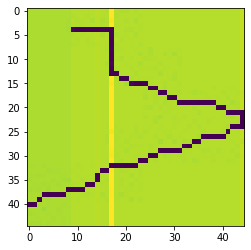

4
1


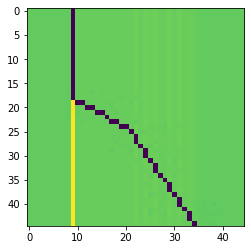

6
0


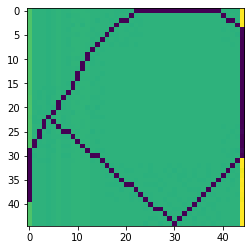

5
3


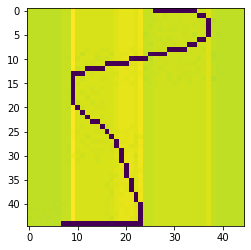

3
9


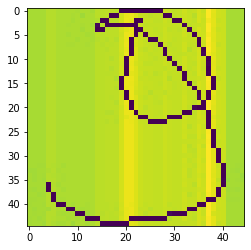

7
2


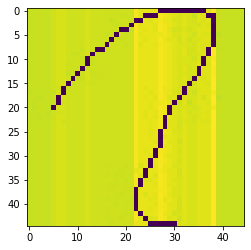

plus
4


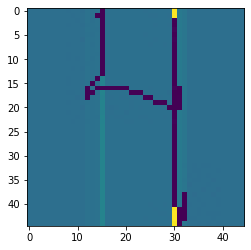

1
7


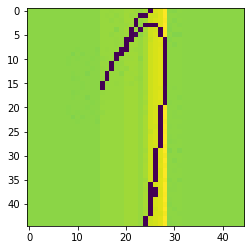

1
plus


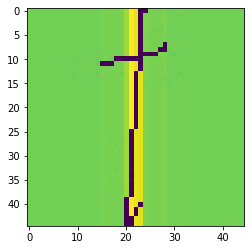

-
2


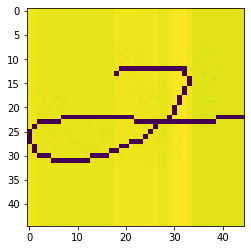

3
7


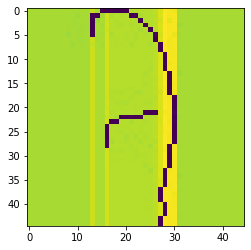

7
9


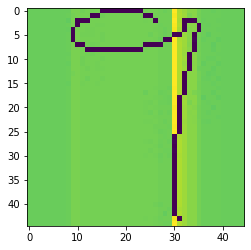

9
4


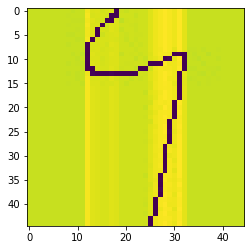

3
5


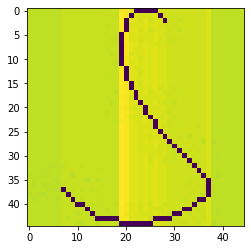

4
1


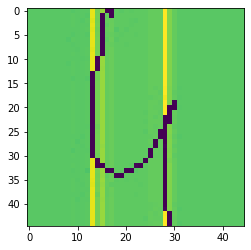

1
5


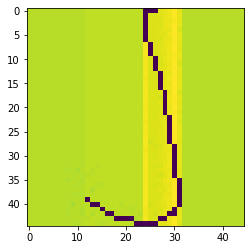

plus
7


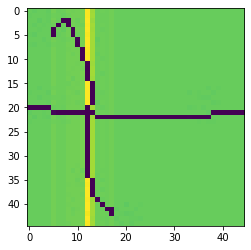

6
0


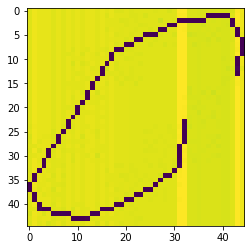

3
9


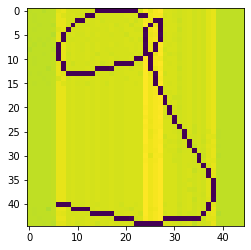

2
1


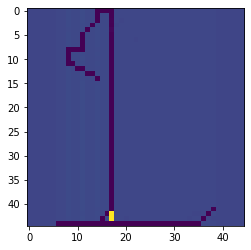

3
7


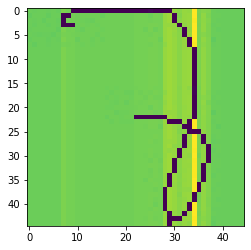

plus
4


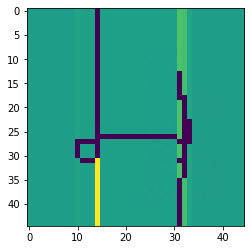

9
3


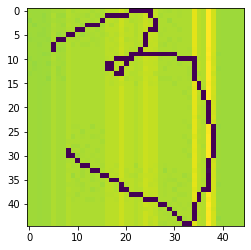

7
1


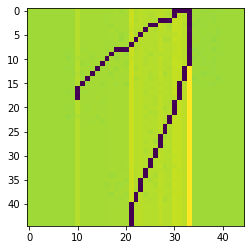

In [9]:
for i in range(0,3000):
    if class_labels[np.argmax(predictions[i])] != class_labels[y_test[i]]:
        print(class_labels[np.argmax(predictions[i])])
        print(class_labels[y_test[i]])
        pyplot.imshow(tf.squeeze(X_test[i]))
        pyplot.show()

In [7]:
import winsound
duration = 2000  # milliseconds
freq = 440  # Hz
winsound.Beep(freq, duration)


In [3]:
from PIL import Image
from os import listdir
from matplotlib import image
from matplotlib import pyplot
import tensorflow as tf
from ipywidgets import IntProgress
from IPython.display import display
import winsound
import cv2
import numpy as np

# Use for testing with pictures put in testsymbols folder
class_labels = ['0','1','2','3','4','5','6','7','8','9'] + ['plus','-','times']
model = tf.keras.models.load_model('math_reader_2.model')    # Here loads the model, make sure to turn off when not needed

f = IntProgress(min=0, max=len(listdir('testsymbols')))
display(f)
test_images = list()
for filename in listdir('testsymbols/'):
    f.value +=1
    img_data = cv2.imread('testsymbols/'+ filename)
    #print(type(img_data))
    img_data = cv2.resize(img_data, dsize=(45,45),interpolation=cv2.INTER_CUBIC)
    img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2GRAY)
    print(img_data.shape)
    test_images.append(img_data)
    #print(symbol)
    #pyplot.imshow(img_data)
    #pyplot.show()

test_images = tf.keras.utils.normalize(test_images, axis=1)
test_images = tf.convert_to_tensor(test_images, dtype=tf.float32)
test_images = tf.reshape(test_images, [-1,45,45,1])
#print(test_images)

test_labels = model.predict(test_images)
#print(test_labels)
labels = list()
for i in range(0,len(test_images)):
    labels.append(class_labels[np.argmax(test_labels[i])])
    #print(test_labels[i])
    pyplot.imshow(tf.squeeze(test_images[i]))
    pyplot.show()
    print(labels[i])
#print(labels)
#print(test_labels)
'''

IntProgress(value=0, max=0)

'\ntest_images = tf.keras.utils.normalize(test_images, axis=1)\ntest_images = tf.convert_to_tensor(test_images, dtype=tf.float32)\ntest_images = tf.reshape(test_images, [-1,45,45,1])\n#print(test_images)\n\ntest_labels = model.predict(test_images)\n#print(test_labels)\nlabels = list()\nfor i in range(0,len(test_images)):\n    labels.append(class_labels[np.argmax(test_labels[i])])\n    #print(test_labels[i])\n    pyplot.imshow(tf.squeeze(test_images[i]))\n    pyplot.show()\n    print(labels[i])\n#print(labels)\n#print(test_labels)\n'

In [23]:
#adds label to filename
from PIL import Image
from os import listdir
from matplotlib import image
from matplotlib import pyplot
import tensorflow as tf
from ipywidgets import IntProgress
from IPython.display import display
import winsound
import cv2
import numpy as np
import os

# Use for testing with pictures put in testsymbols folder
class_labels = ['0','1','2','3','4','5','6','7','8','9'] + ['plus','-','times']
model = tf.keras.models.load_model('math_reader_1.model')    # Here loads the model, make sure to turn off when not needed

test_images = list()
for filename in listdir('testsymbols/'):
    img_data = cv2.imread('testsymbols/'+ filename)
    img_data = cv2.resize(img_data, dsize=(45,45),interpolation=cv2.INTER_CUBIC)
    img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2GRAY)
    test_images.append(img_data)
test_images = tf.keras.utils.normalize(test_images, axis=1)
test_images = tf.convert_to_tensor(test_images, dtype=tf.float32)
test_images = tf.reshape(test_images, [-1,45,45,1])

test_labels = model.predict(test_images)
labels = list()
for i in range(0,len(test_images)):
    labels.append(class_labels[np.argmax(test_labels[i])])
i = 0
for filename in listdir('testsymbols/'):
    prev_filename = 'testsymbols\\'+filename
    post_filename = 'symbolsforanalyzer\\'+filename[:len(filename)-4]+'_'+labels[i]+'.png'
    os.system('copy ' + prev_filename + ' ' + post_filename)
    print('copy ' + prev_filename + ' ' + post_filename)
    i += 1
    

copy testsymbols\231_289_62_128.png symbolsforanalyzer\231_289_62_128_8.png
copy testsymbols\236_474_84_144.png symbolsforanalyzer\236_474_84_144_6.png
copy testsymbols\251_131_16_116.png symbolsforanalyzer\251_131_16_116_1.png
copy testsymbols\372_126_96_139.png symbolsforanalyzer\372_126_96_139_2.png
copy testsymbols\378_286_63_128.png symbolsforanalyzer\378_286_63_128_6.png
copy testsymbols\406_7_13_67.png symbolsforanalyzer\406_7_13_67_1.png
copy testsymbols\407_472_61_140.png symbolsforanalyzer\407_472_61_140_8.png
copy testsymbols\548_269_121_126.png symbolsforanalyzer\548_269_121_126_7.png
copy testsymbols\551_132_66_127.png symbolsforanalyzer\551_132_66_127_3.png
copy testsymbols\594_478_76_127.png symbolsforanalyzer\594_478_76_127_0.png
copy testsymbols\70_428_673_45.png symbolsforanalyzer\70_428_673_45_-.png
copy testsymbols\81_312_71_109.png symbolsforanalyzer\81_312_71_109_plus.png


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from os import listdir
from matplotlib import image
from matplotlib import pyplot
import tensorflow as tf
#from ipywidgets import IntProgress
#from IPython.display import display
import winsound
import cv2
import numpy as np
import os

image = cv2.imread('testequations/testequation5.png')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

cnts, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


# Array of initial bounding rects
rects = []

# Bool array indicating which initial bounding rect has
# already been used
rectsUsed = []

# Just initialize bounding rects and set all bools to false
for cnt in cnts:
    rects.append(cv2.boundingRect(cnt))

for rect in rects:
    #img = cv2.rectangle(image, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (121, 11, 189), 2)
    img = cv2.rectangle(image, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (255,255,255), 2)
plt.imshow(img)
plt.show()
# cropping the image 
img_symbols = list()
for rect in rects:
    crop_img = img[rect[1]:rect[1]+rect[3], rect[0]:rect[0]+rect[2]]
    img_symbols.append(crop_img)
value=[255,255,255]
imgs_final = list()
for img_symbol in img_symbols:
    if img_symbol.shape[0] > img_symbol.shape[1]:
        top = 10
        bottom = top
        left = int(((img_symbol.shape[0] + top + bottom) - img_symbol.shape[1]) / 2)
        right = left
    else:
        left = 10
        right = left
        top = int(((img_symbol.shape[1] + left + right) - img_symbol.shape[0]) / 2)
        bottom = top
    img_border = cv2.copyMakeBorder(img_symbol, top, bottom, left, right, cv2.BORDER_CONSTANT,None, value)
    imgs_final.append(img_border)

# Predict label of image
class_labels = ['0','1','2','3','4','5','6','7','8','9'] + ['plus','-','times']
model = tf.keras.models.load_model('math_reader_2.model')    # Here loads the model, make sure to turn off when not needed

'''
pred_images = list()
for img_data in imgs_final: 
    img_data = cv2.resize(img_data, dsize=(45,45),interpolation=cv2.INTER_CUBIC)
    print(img_data.shape)
    #img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2GRAY)
    pred_images.append(img_data)
'''
imgs_final = tf.keras.utils.normalize(imgs_final, axis=1)
imgs_final = tf.convert_to_tensor(imgs_final, dtype=tf.float32)
imgs_final = tf.reshape(imgs_final, [-1,45,45,1])

probability_labels = model.predict(imgs_final)
labels = list()
for i in range(0, len(pred_images)):
    labels.append(class_labels[np.argmax(probability_labels[i])])
    print(labels[i])
    #plt.imshow(tf.squeeze(pred_images[i], [45,45]))
    #plt.show()
# put information of character's center coordinates and its label into an array
characters = []
for i in range(len(pred_images)):
    characters.append([0] * 2)
print(characters)

'''
symbols_num = 0
symbols = list()
for i in range(pred_images):
    characters[i].append(rects[3] 
'''

'''
filename = lambda j: "testsymbols/"+str(rects[j][0])+"_"+str(rects[j][1])+"_"+str(rects[j][2])+"_"+str(rects[j][3])+".png"
for i in range(0,len(imgs_final)):
    cv2.imwrite(filename(i), imgs_final[i])
'''



ModuleNotFoundError: No module named 'cv2'